In [1]:
import netCDF4
from mpl_toolkits.basemap import Basemap, pyproj
from pyproj import Proj
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import collections
from collections import OrderedDict


In [2]:
dataset = netCDF4.Dataset('../data/netCDF_datafiles/selected_data_023_000.nc')
ncep_hrrr = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')

In [3]:
def lat_lons(open_dap_dataset, proj_key = 'LambertConformal_Projection'):
    xg, yg = np.meshgrid(open_dap_dataset.variables['x'][:]*1000.0, open_dap_dataset.variables['y'][:]*1000.0)
    pnyc = pyproj.Proj(proj = 'lcc', 
                       lat_1 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_2 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_0 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lon_0 = open_dap_dataset.variables[proj_key].longitude_of_central_meridian )
    return pnyc(xg, yg, inverse = True)

In [4]:
lon, lat = lat_lons(ncep_hrrr)

In [5]:
SGPllcrner_lat = 36.04554
SGPllcrner_lon = -98.158014
SGPupcrner_lat = 36.93360
SGPupcrner_lon = -97.025525

a = np.copy(lon, 'K')
b = np.copy(lat, 'K')

for i in range(len(a)):
    for j in range(len(a[i])):
        value = abs(a[i][j] - SGPllcrner_lon)
        a[i][j] = value

SGPllcrner_lon_index = np.where(a == a.min())
print SGPllcrner_lon_index

for i in range(len(b)):
    for j in range(len(b[i])):
        value = abs(b[i][j] - SGPllcrner_lat)
        b[i][j] = value

SGPllcrner_lat_index = np.where(b == b.min())
print SGPllcrner_lat_index

a = np.copy(lon,'K')
b = np.copy(lat, 'K')

for i in range(len(a)):
    for j in range(len(a[i])):
        value = abs(a[i][j] - SGPupcrner_lon)
        a[i][j] = value
        
SGPupcrner_lon_index = np.where(a == a.min())
print SGPupcrner_lon_index

for i in range(len(b)):
    for j in range(len(b[i])):
        value = abs(b[i][j] - SGPupcrner_lat)
        b[i][j] = value

SGPupcrner_lat_index = np.where(b == b.min())
print SGPupcrner_lat_index

(array([213]), array([965]))
(array([624]), array([504]))
(array([1075]), array([1022]))
(array([725]), array([2051]))


In [6]:
print lat.shape
print lon.shape

(1377, 2145)
(1377, 2145)


In [2]:
timeflt_list = []
dset = netCDF4.Dataset('../data/netCDF_datafiles/selected_data_011_007.nc')
units = dset.timestamp[8:-1]
timeflt = float(dset.timestamp[0:4])
dateobj = netCDF4.num2date(timeflt, units)
num = dates.date2num(dateobj)
print num
print dateobj
print dset.timestamp

735801.25
2015-07-22 06:00:00
102.0 :: Hour since 2015-07-18T00:00:00Z


In [31]:
#np.set_printoptions(threshold='nan')

In [4]:
#appends all netcdf files into an ordered dictionary, each key representing a different reftime set.
alldata = {}
reftime = 0
timestep = 0

selected_data_list = []
while reftime <= 23:
    timestep = 0
    while timestep <=9:
        selected_data_list.append('../data/netCDF_datafiles/selected_data_%(r)03d_%(t)03d.nc' %{'r': reftime, 't':timestep})
        timestep += 1
    alldata.update({'selected_data_list%03d' %reftime: selected_data_list})
    selected_data_list = []
    reftime += 1
alldata = collections.OrderedDict(sorted(alldata.items()))
#print alldata


In [29]:
#obtains the time floats of each reftime and saves them into an ordered dictionary.
timeflt_arrays = {}
timeflt_list = []
count = 0

for i in alldata:
    data_list = str(i)
    for j in alldata[data_list]:
        filer = str(j)
        dset = netCDF4.Dataset(filer)
        timeflt = float(dset.timestamp[0:4])
        dateobj = netCDF4.num2date(timeflt, units)
        num = dates.date2num(dateobj)
        timeflt_list.append(num)
    timeflt_arrays.update({'timeflt%03d' %count: timeflt_list})
    count += 1
    timeflt_list = []

timeflt_arrays = collections.OrderedDict(sorted(timeflt_arrays.items()))

In [28]:
pblh_arrays = {}
pblh_list = []
count = 0

for i in alldata:
    data_list = str(i)
    for j in alldata[data_list]:
        file = str(j)
        dset = netCDF4.Dataset(file)
        pblh = dset.variables['Planetary_boundary_layer_height_surface'][625][0]
        pblh_list.append(pblh)
    pblh_arrays.update({'pblh%03d' %count: pblh_list})
    count += 1
    pblh_list = []

pblh_arrays = collections.OrderedDict(sorted(pblh_arrays.items()))
#print pblh_arrays

In [108]:
selected_data_list = []
selected_data_list.extend(('../data/netCDF_datafiles/selected_data_023_000.nc', \
                           '../data/netCDF_datafiles/selected_data_023_001.nc', \
                           '../data/netCDF_datafiles/selected_data_023_002.nc',\
                           '../data/netCDF_datafiles/selected_data_023_003.nc', \
                           '../data/netCDF_datafiles/selected_data_023_004.nc', \
                           '../data/netCDF_datafiles/selected_data_023_005.nc', \
                           '../data/netCDF_datafiles/selected_data_023_006.nc',\
                           '../data/netCDF_datafiles/selected_data_023_007.nc', \
                           '../data/netCDF_datafiles/selected_data_023_008.nc', \
                           '../data/netCDF_datafiles/selected_data_023_009.nc'))

In [109]:
timeflt_list = []
for i in range(len(selected_data_list)):
    dset = netCDF4.Dataset(selected_data_list[i])
    units = dset.timestamp[8:-1]
    timeflt = float(dset.timestamp[0:4])
    dateobj = netCDF4.num2date(timeflt, units)
    num = dates.date2num(dateobj)
    timeflt_list.append(num)

In [110]:
print timeflt_list

[735801.4583333334, 735801.5, 735801.5416666666, 735801.5833333334, 735801.625, 735801.6666666666, 735801.7083333334, 735801.75, 735801.7916666666, 735801.8333333334]


In [26]:
from matplotlib import animation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [140]:
from scipy.interpolate import spline

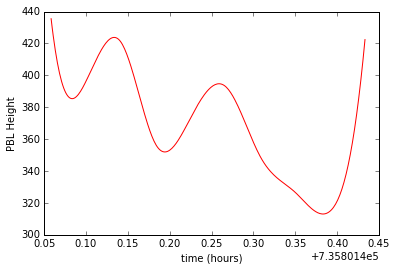

In [147]:
num = 0
i = 'pblh009'
r = np.array(pblh_arrays[i])
k = np.array(timeflt_list)
#plt.plot(k, r, 'rs')
xnew = np.linspace(k.min(), k.max(), 300)
pblhsmooth = spline(k, r, xnew)
plt.ylabel('PBL Height')
plt.xlabel('time (hours)')
plt.plot(xnew, pblhsmooth, 'r-')
savefig('pblh009_example_%03d.png' %num)

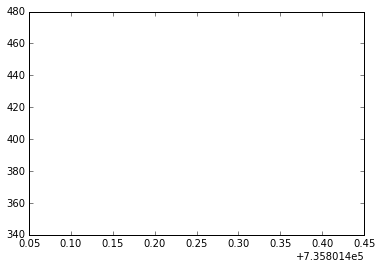

In [133]:
num = 0

for i in pblh_arrays:
    p = np.array(pblh_arrays[i])
    t = np.array(timeflt_list)
    plt.plot(t, p, 'rs')
    plt.ylabel('PBL Height (m)')
    plt.xlabel('time (hours)')
    savefig('PBLHeight_dots_%03d.png' %num)
    plt.cla()
    num += 1


In [31]:
sub_pblh_list = []
for i in pblh_arrays:
    if int(i[4:7]) < 6:
        sub_pblh_list.append(pblh_arrays[i])
        
sub_timeflt_list = []
for i in timeflt_arrays: 
    if int(i[7:10]) < 6:
        sub_timeflt_list.append(timeflt_arrays[i])

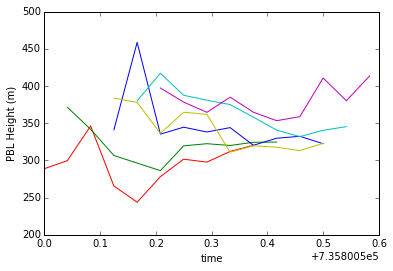

In [30]:
for i,j in zip(sub_pblh_list, sub_timeflt_list):
    p = np.array(i)
    t = np.array(j)
    plt.plot(t, p, '-')
    plt.ylabel('PBL Height (m)')
    plt.xlabel('time')
    plt.rc('axes', color_cycle=['r', 'g', 'b', 'y', 'c', 'm'])
    savefig('000-005_overlay_trial.png')

In [44]:
datafile = cbook.get_sample_data('goog.npy')
print type(datafile)
r = np.load(datafile).view(np.recarray)
print r

<type 'file'>
[ (datetime.date(2004, 8, 19), 100.0, 104.06, 95.96, 100.34, 22351900, 100.34)
 (datetime.date(2004, 8, 20), 101.01, 109.08, 100.5, 108.31, 11428600, 108.31)
 (datetime.date(2004, 8, 23), 110.75, 113.48, 109.05, 109.4, 9137200, 109.4)
 (datetime.date(2004, 8, 24), 111.24, 111.6, 103.57, 104.87, 7631300, 104.87)
 (datetime.date(2004, 8, 25), 104.96, 108.0, 103.88, 106.0, 4598900, 106.0)
 (datetime.date(2004, 8, 26), 104.95, 107.95, 104.66, 107.91, 3551000, 107.91)
 (datetime.date(2004, 8, 27), 108.1, 108.62, 105.69, 106.15, 3109000, 106.15)
 (datetime.date(2004, 8, 30), 105.28, 105.49, 102.01, 102.01, 2601000, 102.01)
 (datetime.date(2004, 8, 31), 102.3, 103.71, 102.16, 102.37, 2461400, 102.37)
 (datetime.date(2004, 9, 1), 102.7, 102.97, 99.67, 100.25, 4573700, 100.25)
 (datetime.date(2004, 9, 2), 99.19, 102.37, 98.94, 101.51, 7566900, 101.51)
 (datetime.date(2004, 9, 3), 100.95, 101.74, 99.32, 100.01, 2578800, 100.01)
 (datetime.date(2004, 9, 7), 101.01, 102.0, 99.61, 101

In [11]:
fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

In [17]:
years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

In [18]:
datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year+1, 1, 1)
ax.set_xlim(datemin, datemax)

(731581.0, 733408.0)

In [19]:
def price(x): return '$%1.2f'%x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

In [ ]:
fig.autofmt_xdate()

plt.show()